### <span style = 'color:green'> Capstone Project </span>
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime 

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter 

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage 
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials 


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones 
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible 
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob,Word


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Twitter_Omicron_data_1_1_1_1.csv')

In [3]:
df.head()

,tweets,likes,time,retweet_count
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1


In [4]:
df.shape

(6998, 4)

In [5]:
df.columns

Index(['tweets', 'likes', 'time', 'retweet_count'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweets         6998 non-null   object
 1   likes          6998 non-null   int64 
 2   time           6998 non-null   object
 3   retweet_count  6998 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 218.8+ KB


In [7]:
df.isnull().sum()

tweets           0
likes            0
time             0
retweet_count    0
dtype: int64

In [8]:
df.describe()

,likes,retweet_count
count,6998.000000,6998.000000
mean,7.253930,1.795513
std,87.700065,26.269914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,4601.000000,1622.000000


In [9]:
# Data Visualization of Target Variables
df['tweets']

0       6 big questions about new Omicron-targeting bo...
1                    I'm confused https://t.co/NyfgdYUYAT
2       Long COVID less likely after Omicron than afte...
3       The finding don't tally with the high numbers ...
4       A conference abstract from the European Congre...
                              ...                        
6993    @Cycl_Conscience @BallouxFrancois Your argumen...
6994    @BretWeinstein I don't think it escaped, they ...
6995    @_50kgold Do you have to show your face? I'd b...
6996    @noxcato @andrewtanyongyi @TAH_Sci @hsom113 @M...
6997    In light of the fact that #Omicron is unrelate...
Name: tweets, Length: 6998, dtype: object

In [10]:
# Data Preprocessing and EDA

In [11]:
def remove_html(text):
    return re.sub(r':.*$', ":",text) #Remove urls

def remove_tags(text):
    return re.sub('@[A-Za-z0-9-]+([A-Z|a-z])','',text)

def strip_html(text):
    soup = BeautifulSoup(text,"html.parser") #Remove https words
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)   #Remove special characters

def denoise_text(text):
    text = remove_html(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_tags(text)
    text = text.lower()  # Convert text to lowercase
    return text  
df['review'] = df['tweets'].apply(denoise_text)
df.head(10)

C:\Users\Jash\AppData\Local\Temp\ipykernel_17880\1562858878.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,"html.parser") #Remove https words
C:\Users\Jash\AppData\Local\Temp\ipykernel_17880\1562858878.py:8: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text,"html.parser") #Remove https words


,tweets,likes,time,retweet_count,review
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions about new omicron-targeting bo...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,i'm confused https:
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely after omicron than afte...
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,the finding don't tally with the high numbers ...
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,a conference abstract from the european congre...
5,FGS @UKHSA pauses ONS C-19 Infection Survey 4 ...,0,2023-03-09 18:12:53,0,fgs pauses ons c-19 infection survey 4 many m...
6,"@SandraHelena39 Look on the bright side, Omicr...",0,2023-03-09 18:12:48,0,"39 look on the bright side, omicron is practic..."
7,@OMICRON_XBB Dream bigger,0,2023-03-09 18:11:32,0,_xbb dream bigger
8,@NOTSubzerodrew As my last wish,0,2023-03-09 18:10:28,0,as my last wish
9,"@thereal_truther @SadieXShaw Again, graphs are...",0,2023-03-09 18:10:23,0,"_truther again, graphs are useless when defin..."


In [12]:
# Removing Special characters
def remove_special_characters(text,remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

df['review'] = df['review'].apply(remove_special_characters)
df.head(5)

,tweets,likes,time,retweet_count,review
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions about new omicrontargeting boo...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused https
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely after omicron than afte...
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,the finding dont tally with the high numbers w...
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,a conference abstract from the european congre...


In [13]:
# now lets tokenize the data

df['tokenize_review'] = df['review'].apply(lambda x: word_tokenize(x))
df.head()

,tweets,likes,time,retweet_count,review,tokenize_review
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions about new omicrontargeting boo...,"[6, big, questions, about, new, omicrontargeti..."
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused https,"[im, confused, https]"
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely after omicron than afte...,"[long, covid, less, likely, after, omicron, th..."
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,the finding dont tally with the high numbers w...,"[the, finding, dont, tally, with, the, high, n..."
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,a conference abstract from the european congre...,"[a, conference, abstract, from, the, european,..."


In [14]:
# now lets remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(token_list):
    filtered_tokens = [word for word in token_list if word not in stop_words]
    return filtered_tokens

# Assuming df['tokenize_review'] contains lists of tokens
df['text_without_stopwords'] = df['tokenize_review'].apply(remove_stopwords)
df.head()

,tweets,likes,time,retweet_count,review,tokenize_review,text_without_stopwords
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions about new omicrontargeting boo...,"[6, big, questions, about, new, omicrontargeti...","[6, big, questions, new, omicrontargeting, boo..."
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused https,"[im, confused, https]","[im, confused, https]"
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely after omicron than afte...,"[long, covid, less, likely, after, omicron, th...","[long, covid, less, likely, omicron, original,..."
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,the finding dont tally with the high numbers w...,"[the, finding, dont, tally, with, the, high, n...","[finding, dont, tally, high, numbers, see, bul..."
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,a conference abstract from the european congre...,"[a, conference, abstract, from, the, european,...","[conference, abstract, european, congress, cli..."


In [15]:
# stemming the data
def simpleStemmer(token_list):
    ps = nltk.porter.PorterStemmer()
    stemmed_tokens = [ps.stem(word) for word in token_list]
    return  stemmed_tokens

df['stem_review'] = df['text_without_stopwords'].apply(simpleStemmer)
df.head(5)


,tweets,likes,time,retweet_count,review,tokenize_review,text_without_stopwords,stem_review
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions about new omicrontargeting boo...,"[6, big, questions, about, new, omicrontargeti...","[6, big, questions, new, omicrontargeting, boo...","[6, big, question, new, omicrontarget, booster..."
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused https,"[im, confused, https]","[im, confused, https]","[im, confus, http]"
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely after omicron than afte...,"[long, covid, less, likely, after, omicron, th...","[long, covid, less, likely, omicron, original,...","[long, covid, less, like, omicron, origin, vir..."
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,the finding dont tally with the high numbers w...,"[the, finding, dont, tally, with, the, high, n...","[finding, dont, tally, high, numbers, see, bul...","[find, dont, talli, high, number, see, bulleti..."
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,a conference abstract from the european congre...,"[a, conference, abstract, from, the, european,...","[conference, abstract, european, congress, cli...","[confer, abstract, european, congress, clinic,..."


In [16]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

def simpleLemmatizer(token_list):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in token_list]
    filtered_text = ' '.join(lemmatized_tokens)
    return filtered_text

# Assuming df['tokenize_review'] contains lists of tokens
df['lemmatized_review'] = df['stem_review'].apply(simpleLemmatizer)
df.head()

,tweets,likes,time,retweet_count,review,tokenize_review,text_without_stopwords,stem_review,lemmatized_review
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions about new omicrontargeting boo...,"[6, big, questions, about, new, omicrontargeti...","[6, big, questions, new, omicrontargeting, boo...","[6, big, question, new, omicrontarget, booster...",6 big question new omicrontarget booster boost...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused https,"[im, confused, https]","[im, confused, https]","[im, confus, http]",im confus http
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely after omicron than afte...,"[long, covid, less, likely, after, omicron, th...","[long, covid, less, likely, omicron, original,...","[long, covid, less, like, omicron, origin, vir...",long covid le like omicron origin viru swiss l...
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,the finding dont tally with the high numbers w...,"[the, finding, dont, tally, with, the, high, n...","[finding, dont, tally, high, numbers, see, bul...","[find, dont, talli, high, number, see, bulleti...",find dont talli high number see bulletin resea...
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,a conference abstract from the european congre...,"[a, conference, abstract, from, the, european,...","[conference, abstract, european, congress, cli...","[confer, abstract, european, congress, clinic,...",confer abstract european congress clinic micro...


In [17]:
# you can see from above lemmatized data is more accurate so will continue with lemmatized data

In [18]:
df.shape

(6998, 9)

In [19]:
norm_train_reviews = df.lemmatized_review[:5500]
print(norm_train_reviews[0])

norm_test_reviews=df.lemmatized_review[5500:]
print(norm_test_reviews[6997])

6 big question new omicrontarget booster boost target target boost http
light fact omicron unrel delta time revisit evid point multipl viru releas multipl locat worldwid would thought putin would one save granni covidvaccin genocid http


In [20]:
# Transforming Dataset using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=1,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)


print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (5500, 118375)
Tfidf_test: (1498, 118375)


In [21]:
from textblob import TextBlob
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

df['polarity'] = df['lemmatized_review'].apply(pol)
df['subjectivity'] = df['lemmatized_review'].apply(sub)

df.head()

,tweets,likes,time,retweet_count,review,tokenize_review,text_without_stopwords,stem_review,lemmatized_review,polarity,subjectivity
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions about new omicrontargeting boo...,"[6, big, questions, about, new, omicrontargeti...","[6, big, questions, new, omicrontargeting, boo...","[6, big, question, new, omicrontarget, booster...",6 big question new omicrontarget booster boost...,0.068182,0.277273
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused https,"[im, confused, https]","[im, confused, https]","[im, confus, http]",im confus http,0.000000,0.000000
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely after omicron than afte...,"[long, covid, less, likely, after, omicron, th...","[long, covid, less, likely, omicron, original,...","[long, covid, less, like, omicron, origin, vir...",long covid le like omicron origin viru swiss l...,-0.050000,0.400000
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,the finding dont tally with the high numbers w...,"[the, finding, dont, tally, with, the, high, n...","[finding, dont, tally, high, numbers, see, bul...","[find, dont, talli, high, number, see, bulleti...",find dont talli high number see bulletin resea...,0.160000,0.540000
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,a conference abstract from the european congre...,"[a, conference, abstract, from, the, european,...","[conference, abstract, european, congress, cli...","[confer, abstract, european, congress, clinic,...",confer abstract european congress clinic micro...,0.100000,0.100000


In [22]:
# Data Visualization of Target Variables
import itertools
import collections
all_words = df['lemmatized_review'].apply(word_tokenize)
all_words_flat = list(itertools.chain.from_iterable(all_words))
counts = collections.Counter(all_words_flat)
count_frequency = counts.most_common(200)

clean_tweets = pd.DataFrame(count_frequency, columns=['words', 'count'])

In [23]:
# Data Visualization of Target Variables
all_words_flat = [word for sublist in all_words for word in sublist]
counts = collections.Counter(all_words_flat)

# Get the most common words
count_frequency = counts.most_common(200)

# Create a DataFrame with the word counts
clean_tweets = pd.DataFrame(count_frequency, columns=['words', 'count'])
clean_tweets.head()

,words,count
0,omicron,6268
1,http,2473
2,vaccin,1393
3,variant,1380
4,covid,1289


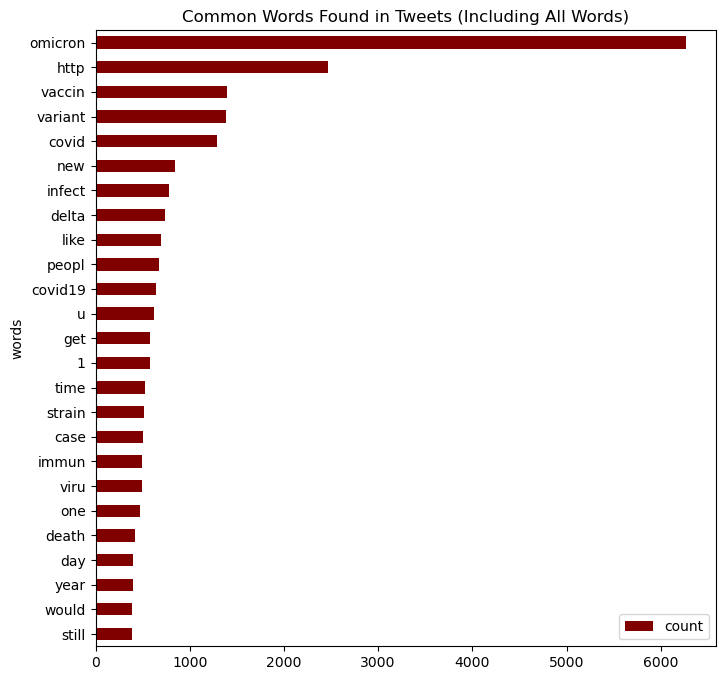

In [24]:
# Data Visualization of Target Variables
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets[:25].sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='maroon')
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

In [25]:
# Using sentiment.polarity_score function, Find the polarity score of all the tweets and categorize them as Positive, Negative or Neutral.
PNN = df['polarity'].apply(lambda x: "Positive" if x>=0.05 else ("Negative" if x<= -0.05 else "Neutral"))
new_review = df['lemmatized_review']
new_review = new_review.tolist()
PNN = PNN.tolist()

dict = {'text':new_review, 'polarity':PNN}
pnn = pd.DataFrame(dict)
pnn.head()

,text,polarity
0,6 big question new omicrontarget booster boost...,Positive
1,im confus http,Neutral
2,long covid le like omicron origin viru swiss l...,Negative
3,find dont talli high number see bulletin resea...,Positive
4,confer abstract european congress clinic micro...,Positive


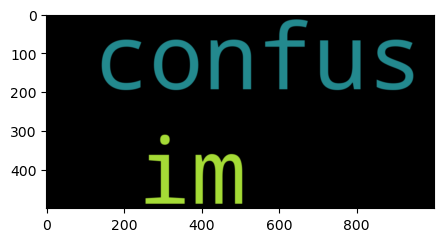

In [26]:
# Using wordcloud or other visualization techniques, Find the most common words used positive and negative tweets
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(5,5))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show()

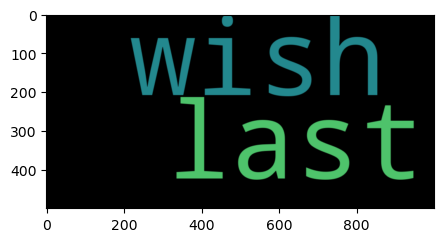

In [27]:
plt.figure(figsize=(5,5))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

In [28]:
# Based on the polarity scores of every tweet, plot the mean positivity / negativity scores
df['PN'] = df['polarity'].apply(lambda x: "Positive" if x>=0 else "Negative")

In [29]:
df.head()

,tweets,likes,time,retweet_count,review,tokenize_review,text_without_stopwords,stem_review,lemmatized_review,polarity,subjectivity,PN
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions about new omicrontargeting boo...,"[6, big, questions, about, new, omicrontargeti...","[6, big, questions, new, omicrontargeting, boo...","[6, big, question, new, omicrontarget, booster...",6 big question new omicrontarget booster boost...,0.068182,0.277273,Positive
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused https,"[im, confused, https]","[im, confused, https]","[im, confus, http]",im confus http,0.000000,0.000000,Positive
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely after omicron than afte...,"[long, covid, less, likely, after, omicron, th...","[long, covid, less, likely, omicron, original,...","[long, covid, less, like, omicron, origin, vir...",long covid le like omicron origin viru swiss l...,-0.050000,0.400000,Negative
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,the finding dont tally with the high numbers w...,"[the, finding, dont, tally, with, the, high, n...","[finding, dont, tally, high, numbers, see, bul...","[find, dont, talli, high, number, see, bulleti...",find dont talli high number see bulletin resea...,0.160000,0.540000,Positive
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,a conference abstract from the european congre...,"[a, conference, abstract, from, the, european,...","[conference, abstract, european, congress, cli...","[confer, abstract, european, congress, clinic,...",confer abstract european congress clinic micro...,0.100000,0.100000,Positive


In [30]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['label'] = lb.fit_transform(df['PN'])

In [31]:
df.head()

,tweets,likes,time,retweet_count,review,tokenize_review,text_without_stopwords,stem_review,lemmatized_review,polarity,subjectivity,PN,label
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions about new omicrontargeting boo...,"[6, big, questions, about, new, omicrontargeti...","[6, big, questions, new, omicrontargeting, boo...","[6, big, question, new, omicrontarget, booster...",6 big question new omicrontarget booster boost...,0.068182,0.277273,Positive,1
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused https,"[im, confused, https]","[im, confused, https]","[im, confus, http]",im confus http,0.000000,0.000000,Positive,1
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely after omicron than afte...,"[long, covid, less, likely, after, omicron, th...","[long, covid, less, likely, omicron, original,...","[long, covid, less, like, omicron, origin, vir...",long covid le like omicron origin viru swiss l...,-0.050000,0.400000,Negative,0
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,the finding dont tally with the high numbers w...,"[the, finding, dont, tally, with, the, high, n...","[finding, dont, tally, high, numbers, see, bul...","[find, dont, talli, high, number, see, bulleti...",find dont talli high number see bulletin resea...,0.160000,0.540000,Positive,1
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,a conference abstract from the european congre...,"[a, conference, abstract, from, the, european,...","[conference, abstract, european, congress, cli...","[confer, abstract, european, congress, clinic,...",confer abstract european congress clinic micro...,0.100000,0.100000,Positive,1


In [32]:
df.shape

(6998, 13)

In [33]:
# Splitting our data into Train and Test Subset
train = df.label[:5500]
test = df.label[5500:]

In [34]:
# Model Building using Support Vector Machines
from sklearn import svm
svm = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
svm_tfidf = svm.fit(tv_train_reviews,train)
print(svm_tfidf)

SVC(kernel='linear', random_state=0)


In [35]:
# evaluation

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

# Accuracy Score
svm_tfidf_score = accuracy_score(test,svm_tfidf_predict)
print(svm_tfidf_score)

[1 1 1 ... 1 1 1]
0.7950600801068091


In [36]:
# Classification report
svm_tfidf_report = classification_report(test,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.06      0.10       325
    Negative       0.79      1.00      0.88      1173

    accuracy                           0.80      1498
   macro avg       0.90      0.53      0.49      1498
weighted avg       0.84      0.80      0.72      1498



In [37]:
# Confusion matrix
cm_tfidf = confusion_matrix(test,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[1173    0]
 [ 307   18]]


In [38]:
# Conclusion
#In summary, this project aimed to analyze sentiment on Omnicron variant, data fetching directly from twitter
# we used Support Vector Machine and  achieved the highest accuracy of 79.5%
# for converting the text data into numerical we used TF-IDF Vectorizer

In [39]:
# also i can say Lemmatization is better or performs well than stemming in most of the cases and also on our data
# but stemming takes less time and resources
# overall our model is good performing model with 79.5% accuracy score
#thankyou